In [ ]:
#@title ResNet50

In [ ]:
#@title Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import keras
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.utils as image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input, Dense, Flatten, Dropout

In [2]:
#@title Preparing The Data
data_dir="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/train"
data_dir = pathlib.Path(data_dir)

In [3]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 4536 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 1134 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Overripe', 'Ripe', 'Unripe']


In [6]:
model = Sequential()
# put your classes in number
num_classes = 3

pretrained_model= ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='max',
    classifier_activation="softmax",
    classes=num_classes)

for layer in pretrained_model.layers:
  layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
epoch=50

my_callbacks = [
    # save logs while training in csv file
    keras.callbacks.CSVLogger('C:/Users/chand/Documents/Github/ResNet50/Logs/log.csv', separator=",", append=False),
    # keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
    ]

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


In [10]:
#@title Train your model
history = model.fit(train_ds,validation_data=val_ds,
                    epochs=epoch,
                    callbacks=[my_callbacks],
                    batch_size=32,verbose=1)

Epoch 1/50
142/142 [==============================] - 21s 83ms/step - loss: 2.8730 - accuracy: 0.6695 - val_loss: 0.4656 - val_accuracy: 0.8034
Epoch 2/50
142/142 [==============================] - 12s 83ms/step - loss: 0.4862 - accuracy: 0.7879 - val_loss: 0.4187 - val_accuracy: 0.8201
Epoch 3/50
142/142 [==============================] - 12s 84ms/step - loss: 0.4018 - accuracy: 0.8294 - val_loss: 0.3546 - val_accuracy: 0.8545
Epoch 4/50
142/142 [==============================] - 13s 89ms/step - loss: 0.3502 - accuracy: 0.8512 - val_loss: 0.3292 - val_accuracy: 0.8677
Epoch 5/50
142/142 [==============================] - 13s 91ms/step - loss: 0.3117 - accuracy: 0.8664 - val_loss: 0.3059 - val_accuracy: 0.8774
Epoch 6/50
142/142 [==============================] - 14s 95ms/step - loss: 0.2873 - accuracy: 0.8805 - val_loss: 0.3219 - val_accuracy: 0.8810
Epoch 7/50
142/142 [==============================] - 15s 103ms/step - loss: 0.2536 - accuracy: 0.8942 - val_loss: 0.2821 - val_accuracy

In [19]:
#@title save final model
model.save("C:/Users/chand/Documents/Github/ResNet50/Model/model.h5")

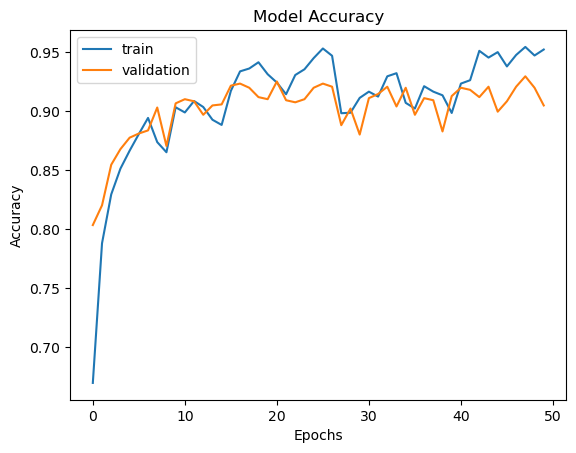

In [12]:
#@title accuracy graph
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

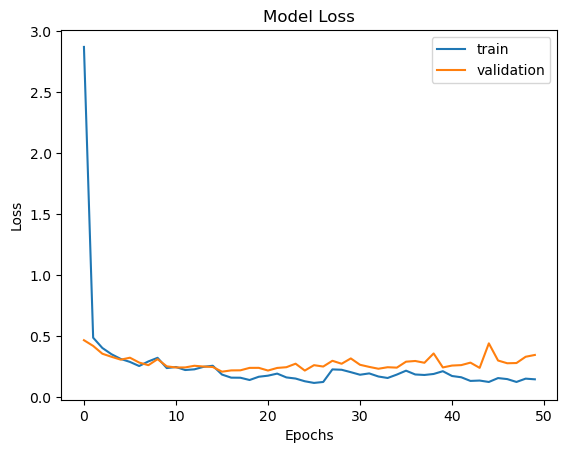

In [13]:
#@title loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix

In [3]:
image_generator = keras.preprocessing.image.ImageDataGenerator()
test_data="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test"
test_image_data  = image_generator.flow_from_directory(test_data,target_size=(224,224), batch_size=700)

Found 630 images belonging to 3 classes.


In [4]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (630, 224, 224, 3)
Label batch shape:  (630, 3)


In [5]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

20/20 [==============================] - 18s 866ms/step


In [6]:
from sklearn.metrics import classification_report
target_names = ['overripe', 'ripe', 'unripe']
print(classification_report(label_id, predicted_id, zero_division=0, target_names=target_names))

              precision    recall  f1-score   support

    overripe       0.57      0.86      0.68       210
        ripe       0.49      0.32      0.39       210
      unripe       0.93      0.77      0.84       210

    accuracy                           0.65       630
   macro avg       0.66      0.65      0.64       630
weighted avg       0.66      0.65      0.64       630



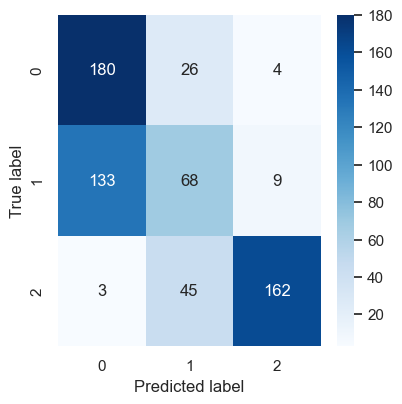

In [7]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

# Compute confusion matrix
con_mat = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

# Create the plot
figure = plt.figure(figsize=(4,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Model Load

In [2]:
# Load the trained model
model = load_model("C:/Users/chand/Documents/Github/ResNet50/Model/model.h5")